<a href="https://colab.research.google.com/github/princepriyadarshi2017/AlmaBetter-EDA-Capstone-Project-Global-Terrorism/blob/main/Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

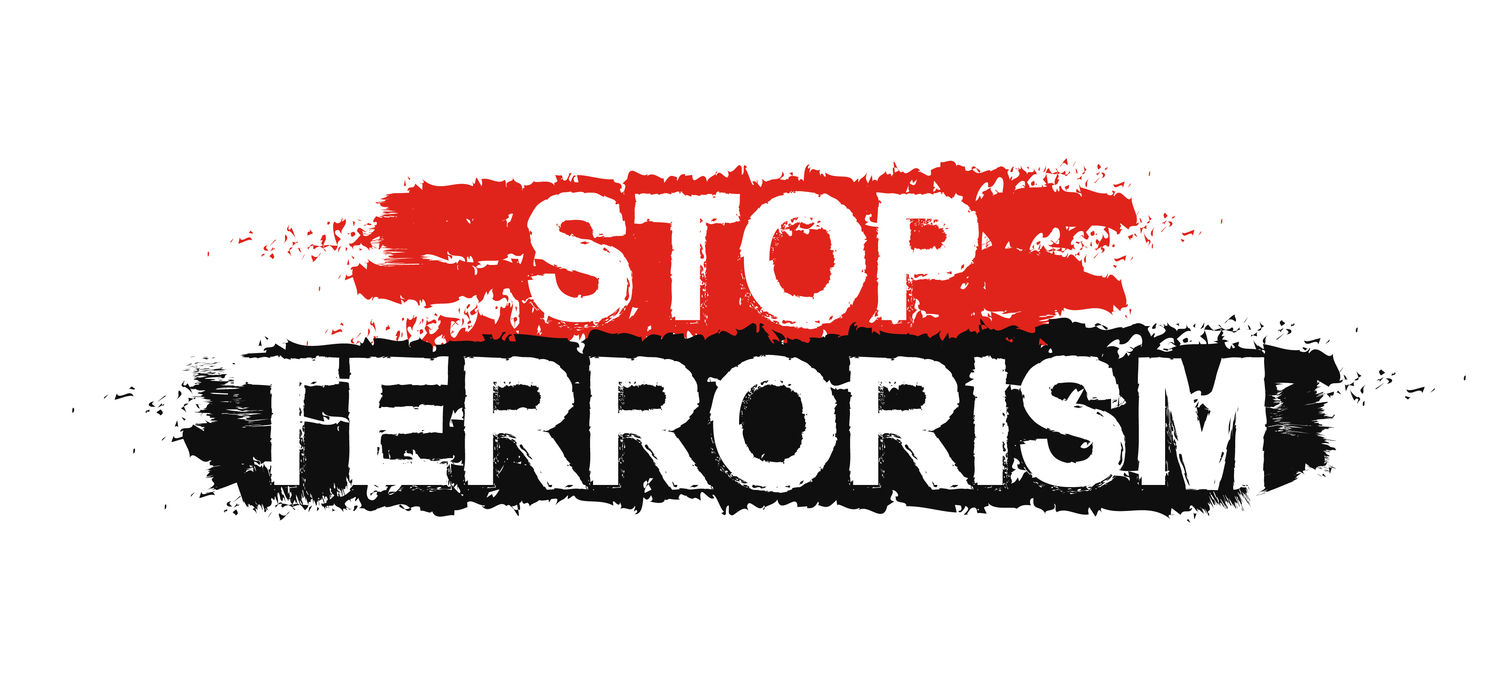

In [2]:
#importing imporatant library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium as mp

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/PROJECT/EDA/Global Terrorism Analysis/Global Terrorism Data.csv',encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,20

In [6]:
df.shape

(181691, 135)

In [7]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [9]:
df.summary

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
181686    12/31/2017: Assailants opened fire on a Somali...
181687    12/31/2017: Assailants launched mortars at the...
181688    12/31/2017: Assailants set fire to houses in K...
181689    12/31/2017: Assailants threw a grenade at a Fo...
181690    12/31/2017: An explosive device was discovered...
Name: summary, Length: 181691, dtype: object

In [10]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [11]:
df.columns #name of the columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Managing NULL values

In [12]:
df.isnull().sum() #number of null values in each column

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [13]:
df.shape[0] #number of rows

181691

## **% of data null in every column**

In [14]:
null_var=df.isnull().sum()/df.shape[0]*100  #calculating percentage of null values in each columns
null_var

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64

In [15]:
drop_column=null_var [null_var >10].keys() #stroring the name of coulmns which is having more then 10% of null values
drop_column 

Index(['approxdate', 'resolution', 'location', 'summary', 'alternative',
       'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'corp1', 'targtype2', 'targtype2_txt',
       'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2',
       'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt',
       'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
       'guncertain2', 'guncertain3', 'nperps', 'nperpcap', 'claimed',
       'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt',
       'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weapsubtype1',
       'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt', 'weapsubtype2',
       'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3',
       'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4',
       'weapsubtype4_txt', 'weapdetail', 'nkillus',

In [16]:
droped_df=df.drop(columns=drop_column) # droping the coulmns which is having more then 10% of null values
droped_df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,5,Firearms,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,6,Explosives,2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0,8,Incendiary,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Office,92.0,India,Unknown,0.0,0,6,Explosives,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [17]:
droped_df.shape #we have droped 90 columns which is having more then 10% of null values

(181691, 45)

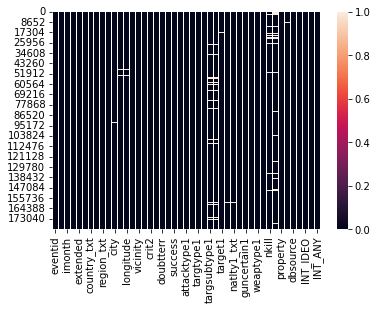

In [18]:
sns.heatmap(droped_df.isnull())
# In this plot we can see that still there is null value present in the dataframe which will affect our EDA so will drop that

In [19]:
droped_df=droped_df.dropna()

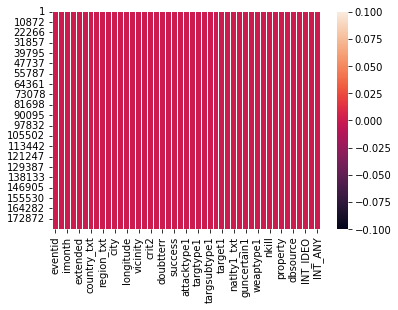

In [20]:
sns.heatmap(droped_df.isnull()) #now we can see that there is no null value

## Deleting unwanted Columns

In [21]:
dataset=droped_df.drop(columns=['extended', 'country','region','specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple','weaptype1','attacktype1','targtype1','targsubtype1','natlty1', 'natlty1_txt',
       'guncertain1', 'individual', 
        'weaptype1','property', 'ishostkid', 'dbsource','INT_LOG', 
        'INT_IDEO', 'INT_MISC', 'INT_ANY'])

In [22]:
dataset.columns 

Index(['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'success', 'suicide',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'target1',
       'gname', 'weaptype1_txt', 'nkill', 'nwound'],
      dtype='object')

In [23]:
dataset.shape #now we can see that only 20 columns are present

(149355, 20)

## Renameing the remaning columns

In [24]:
dataset=dataset.rename(columns={
    'eventid':'event_id',
    'iyear':'year',
    'imonth':'month',
    'iday':'day',
    'country_txt':'country',
    'region_txt':'region',
       'provstate':'state',
       'attacktype1_txt':'attack_type',
    'targtype1_txt':'targ_type',
    'targsubtype1_txt':'targsub_type',
    'target1':'main_target',
       'gname':'gang_name',
    'weaptype1_txt':'weapon_type',
    'nkill':'number_of_kill',
    'nwound':'number_of_wound'
    
})

In [25]:
dataset.columns

Index(['event_id', 'year', 'month', 'day', 'country', 'region', 'state',
       'city', 'latitude', 'longitude', 'success', 'suicide', 'attack_type',
       'targ_type', 'targsub_type', 'main_target', 'gang_name', 'weapon_type',
       'number_of_kill', 'number_of_wound'],
      dtype='object')

## Country with most attacks - City with most attacks - Region with the most attacks - Year with the most attacks - Month with the most attacks - Group with the most attacks - Most Attack Types

In [26]:
print('Country with most attacks: ',dataset['country'].value_counts().idxmax())
Country_with_most_attacks=dataset['country'].value_counts().idxmax()
dataset[dataset['country']==Country_with_most_attacks]
print('City with most attacks: ',dataset['city'].value_counts().idxmax())
City_with_most_attacks=dataset['city'].value_counts().idxmax()

print("Region with the most attacks:",dataset['region'].value_counts().idxmax())
Region_with_the_most_attacks=dataset['region'].value_counts().idxmax()

print("Year with the most attacks:",dataset['year'].value_counts().idxmax())
Year_with_the_most_attacks=dataset['year'].value_counts().idxmax()
    
print("Month with the most attacks:",dataset['month'].value_counts().idxmax())
Month_with_the_most_attacks=dataset['month'].value_counts().idxmax()

print("Group with the most attacks:",dataset['gang_name'].value_counts().index[1])
Group_with_the_most_attacks=dataset['gang_name'].value_counts().index[1]

print("Most Attack Types:",dataset['attack_type'].value_counts().idxmax())
Most_Attack_Types=dataset['attack_type'].value_counts().idxmax()


Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


## Ploting in maps of most attacked country

In [27]:
Country_with_most_attacks_latitude=dataset[dataset['country']==Country_with_most_attacks].iloc[0:9]
ma=mp.Map(location=[36.354145,43.143570])
for i in Country_with_most_attacks_latitude.itertuples():
    mp.Marker(location=[i.latitude,i.longitude],popup=i.city
).add_to(ma)
ma

## Attacks in every year

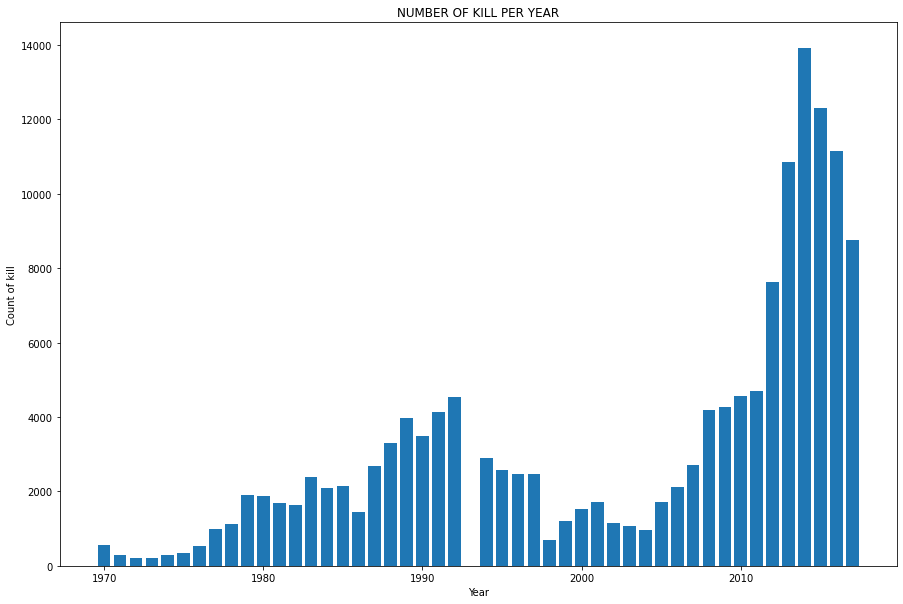

In [28]:
# attacks in every year
x_year = dataset['year'].unique()
y_year = dataset['year'].value_counts().sort_index()
plt.figure(figsize=(15,10))
plt.bar(x_year, y_year)
plt.title('NUMBER OF KILL PER YEAR')
plt.xlabel('Year')
plt.ylabel('Count of kill')
plt.show()




## Terrorist group names and number of killed

In [29]:
#Terrorist group names and number of killed 
group_killed= dataset[['gang_name','number_of_kill']].groupby(['gang_name'],axis=0).sum().sort_values('number_of_kill', ascending=False).head(15)
group_killed.reset_index()

,gang_name,number_of_kill
0,Unknown,95399.0
1,Islamic State of Iraq and the Levant (ISIL),27174.0
2,Taliban,25785.0
3,Boko Haram,10732.0
4,Liberation Tigers of Tamil Eelam (LTTE),9393.0
5,Shining Path (SL),9315.0
6,Al-Shabaab,6836.0
7,Farabundo Marti National Liberation Front (FMLN),6801.0
8,Tehrik-i-Taliban Pakistan (TTP),5580.0
9,Revolutionary Armed Forces of Colombia (FARC),4380.0


## People Killed by each group in terrorist activity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


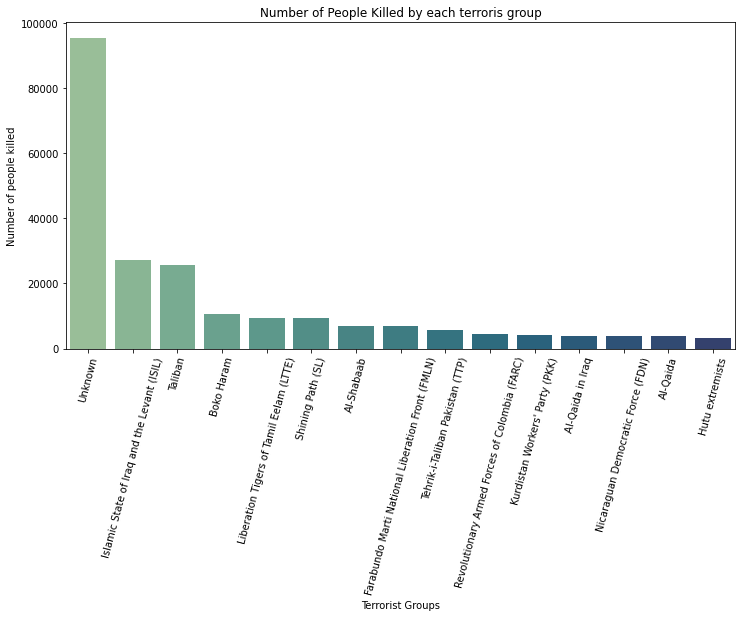

In [30]:
## People Killed by each group in terrorist activity
plt.subplots(figsize=(12,6))
sns.barplot(group_killed.index, group_killed.number_of_kill.values,palette="crest")
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 75)
plt.show()

## Where was maximum huanity loss

In [31]:
dataset[dataset['number_of_kill']==dataset.number_of_kill.max()]

,event_id,year,month,day,country,region,state,city,latitude,longitude,success,suicide,attack_type,targ_type,targsub_type,main_target,gang_name,weapon_type,number_of_kill,number_of_wound
73126,200109110004,2001,9,11,United States,North America,New York,New York City,40.697132,-73.931351,1,1,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Passengers and crew members on American Airlin...,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,1384.0,8190.0


## Max number of kill in each country which is greater then 200

In [32]:
g_country=dataset.groupby('country')
max_number_of_kill_in_each_country=g_country.max('number_of_kill')
max_number_of_kill_in_each_country


,event_id,year,month,day,latitude,longitude,success,suicide,number_of_kill,number_of_wound
country,,,,,,,,,,
Afghanistan,201712310020,2017,12,31,37.769393,71.584167,1,1,266.0,491.0
Albania,201710110028,2017,12,29,42.399981,20.421944,1,0,6.0,30.0
Algeria,201709220009,2017,12,31,37.068190,9.556767,1,1,256.0,286.0
Angola,201708250057,2017,12,31,-4.446342,23.016835,1,0,130.0,405.0
Argentina,201708020032,2017,12,31,-23.276090,-55.900812,1,1,85.0,236.0
...,...,...,...,...,...,...,...,...,...,...
Yemen,201712290016,2017,12,31,17.489364,50.581538,1,1,110.0,300.0
Yugoslavia,200206130002,2002,12,31,46.100278,22.143022,1,0,20.0,40.0
Zaire,199705120008,1997,12,31,1.010278,29.593583,1,0,28.0,50.0


In [33]:
max_number_of_kill_in_each_country=max_number_of_kill_in_each_country[max_number_of_kill_in_each_country['number_of_kill']>300]
max_number_of_kill_in_each_country=max_number_of_kill_in_each_country.reset_index()
max_number_of_kill_in_each_country

,country,event_id,year,month,day,latitude,longitude,success,suicide,number_of_kill,number_of_wound
0,Burundi,201712040036,2017,12,31,-2.525794,30.770913,1,0,375.0,140.0
1,Canada,201709300013,2017,12,31,55.754211,-64.778231,1,1,329.0,30.0
2,Egypt,201712290003,2017,12,31,31.441411,34.899447,1,1,311.0,159.0
3,Iran,201707150027,2017,12,31,39.391389,62.348337,1,1,422.0,700.0
4,Iraq,201712310012,2017,12,31,37.230226,70.064041,1,1,670.0,1500.0
5,Mozambique,201712170030,2017,12,31,-10.596982,40.672784,1,0,388.0,100.0
6,Nepal,201712220016,2017,12,31,29.916806,88.155974,1,0,518.0,216.0
7,Russia,201712280028,2017,12,31,74.633553,158.383333,1,1,344.0,727.0
8,Rwanda,201706200037,2017,12,31,-1.448369,30.775917,1,0,1180.0,227.0
9,Somalia,201712310022,2017,12,31,11.472014,51.077309,1,1,588.0,316.0


### Max number of kill in each country which is greater then 200

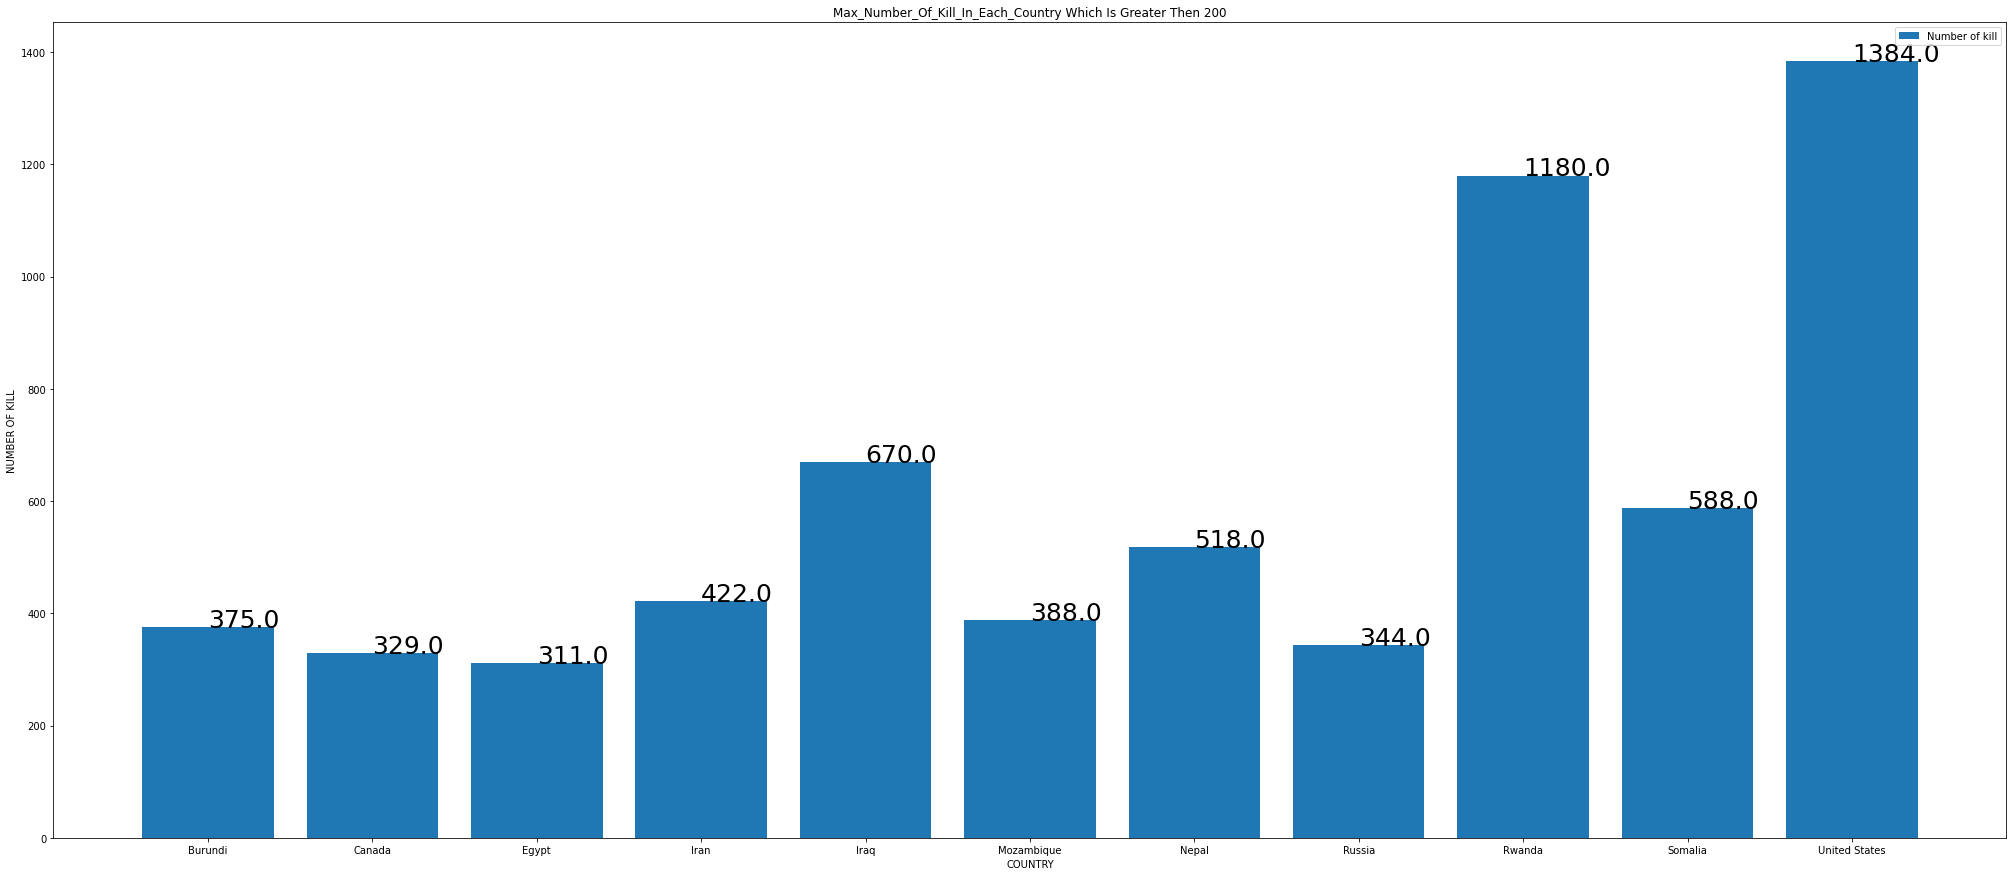

In [34]:
plt.figure(figsize=(35,15))
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF KILL')
plt.title('Max_Number_Of_Kill_In_Each_Country Which Is Greater Then 200')
plt.bar(max_number_of_kill_in_each_country.country,max_number_of_kill_in_each_country.number_of_kill,label='Number of kill')
plt.legend()
for i in range(len(max_number_of_kill_in_each_country['country'])):
        plt.text(max_number_of_kill_in_each_country['country'][i],max_number_of_kill_in_each_country['number_of_kill'][i],max_number_of_kill_in_each_country['number_of_kill'][i],fontsize=25)

## NOW focusing on AL-QAIDA

In [35]:
group_gname=dataset.groupby('gang_name')
Al_Qaida=group_gname.get_group('Al-Qaida')
Al_Qaida

,event_id,year,month,day,country,region,state,city,latitude,longitude,success,suicide,attack_type,targ_type,targsub_type,main_target,gang_name,weapon_type,number_of_kill,number_of_wound
54691,199212290002,1992,12,29,Yemen,Middle East & North Africa,Adan,Aden,12.852693,44.894836,1,0,Bombing/Explosion,Business,Hotel/Resort,Gold Muhor Hotel,Al-Qaida,Explosives,2.0,5.0
54692,199212290003,1992,12,29,Yemen,Middle East & North Africa,Adan,Aden,12.852693,44.894836,0,0,Bombing/Explosion,Business,Hotel/Resort,Aden Movenpick Hotel,Al-Qaida,Explosives,1.0,1.0
68071,199808070002,1998,8,7,Kenya,Sub-Saharan Africa,Nairobi,Nairobi,-1.285180,36.821107,1,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,"United States Embassy in Nairobi, Kenya",Al-Qaida,Explosives,224.0,4000.0
68072,199808070003,1998,8,7,Tanzania,Sub-Saharan Africa,Dar es Salaam,Dar es Salaam,-6.813546,39.239418,1,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,"United States Embassy in Dar es Salaam, Tanzania",Al-Qaida,Explosives,11.0,85.0
69876,200001030010,2000,1,3,Yemen,Middle East & North Africa,Adan,Aden,12.825647,44.846416,0,1,Bombing/Explosion,Military,Military Maritime,USS The Sullivans,Al-Qaida,Explosives,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85923,200803110011,2008,3,11,Pakistan,South Asia,Punjab,Lahore,31.505470,74.342880,1,1,Bombing/Explosion,Police,"Police Building (headquarters, station, school)",Federal Investigation Agency.,Al-Qaida,Explosives,27.0,200.0
85944,200803150001,2008,3,15,Pakistan,South Asia,Islamabad Capital Territory,Islamabad,33.671638,73.056068,1,0,Bombing/Explosion,Tourists,Tourist,Foreign nationals.,Al-Qaida,Explosives,1.0,10.0
87834,200807090016,2008,7,9,Turkey,Middle East & North Africa,Istanbul,Istanbul,41.106178,28.689863,1,0,Armed Assault,Police,Police Security Forces/Officers,Turkish police officers,Al-Qaida,Firearms,6.0,2.0
95008,201001190011,2010,1,0,Pakistan,South Asia,Sindh,Larkana,27.560076,68.215714,1,0,Hostage Taking (Kidnapping),Private Citizens & Property,Unnamed Civilian/Unspecified,Two civilians,Al-Qaida,Unknown,0.0,0.0


In [36]:
Al_Qaida[Al_Qaida['number_of_kill']>20]

,event_id,year,month,day,country,region,state,city,latitude,longitude,success,suicide,attack_type,targ_type,targsub_type,main_target,gang_name,weapon_type,number_of_kill,number_of_wound
68071,199808070002,1998,8,7,Kenya,Sub-Saharan Africa,Nairobi,Nairobi,-1.285180,36.821107,1,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,"United States Embassy in Nairobi, Kenya",Al-Qaida,Explosives,224.0,4000.0
73126,200109110004,2001,9,11,United States,North America,New York,New York City,40.697132,-73.931351,1,1,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Passengers and crew members on American Airlin...,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,1384.0,8190.0
73127,200109110005,2001,9,11,United States,North America,New York,New York City,40.697132,-73.931351,1,1,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Passengers and crew members on United Airlines...,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,1383.0,8191.0
73128,200109110006,2001,9,11,United States,North America,Virginia,Arlington,38.878742,-77.100006,1,1,Hijacking,Government (General),Government Building/Facility/Office,Passengers and crew members on American Airlin...,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,190.0,106.0
73129,200109110007,2001,9,11,United States,North America,Pennsylvania,Shanksville,40.018464,-78.907197,1,1,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Airline passengers and crew members on board A...,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,44.0,6.0
73959,200204110003,2002,4,11,Tunisia,Middle East & North Africa,Medenine Governorate,Er Riadh,33.819136,10.855024,1,1,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Synagogue and tourists.,Al-Qaida,Explosives,21.0,30.0
76324,200403110001,2004,3,11,Spain,Western Europe,Madrid,Madrid,40.465595,-3.696263,1,0,Bombing/Explosion,Transportation,Train/Train Tracks/Trolley,Indiscriminate civilians on commuter trains in...,Al-Qaida,Explosives,37.0,450.0
76326,200403110003,2004,3,11,Spain,Western Europe,Madrid,Madrid,40.465595,-3.696263,1,0,Bombing/Explosion,Transportation,Train/Train Tracks/Trolley,Indiscriminate civilians on commuter trains in...,Al-Qaida,Explosives,73.0,450.0
76330,200403110007,2004,3,11,Spain,Western Europe,Madrid,Madrid,40.465595,-3.696263,1,0,Bombing/Explosion,Transportation,Train/Train Tracks/Trolley,Indiscriminate civilians on commuter trains in...,Al-Qaida,Explosives,62.0,450.0
78219,200506010001,2005,6,1,Afghanistan,South Asia,Kandahar,Kandahar,31.631083,65.742226,1,1,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Abdul Rab Akhundzada Mosque,Al-Qaida,Explosives,21.0,52.0


## Al_Qaida Most mischievous gang in early 20's and have done most number kill till date and the weapon used for killing is only two 
## Explosives and vehicle-borne explosive
## so if we control on the illegal tranportation of weapons then we can reduse
## we can see that in only one year (2001) there were 2 attacks on the same day so we can in same country
### so we can say that there might me some disput between USA and Al_Qaida

In [37]:
#to check which region is affected by terrorism in each year
from ipywidgets import interact, interact_manual
@interact

def attack_year(year=list(dataset["year"].unique())):
    a=dataset[dataset["year"]==year]
    return sns.countplot(y=a["region"], palette="viridis")

interactive(children=(Dropdown(description='year', options=(1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 19…

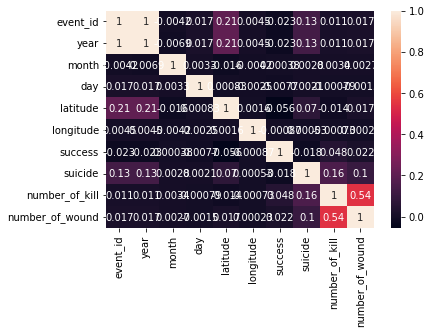

In [52]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Percentage of attacks by each gangs out of total

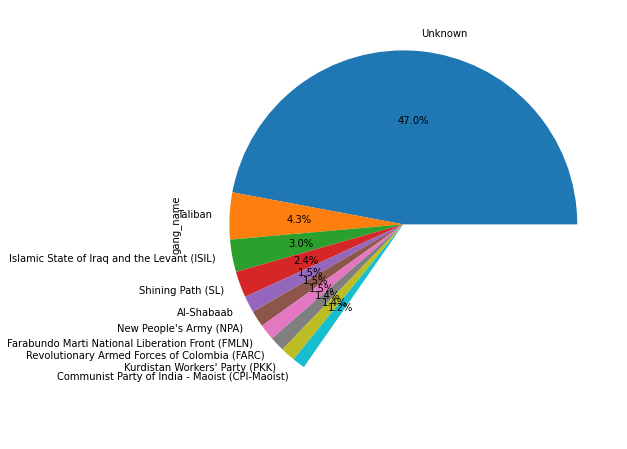

In [40]:
df1=dataset.gang_name.value_counts(normalize=True,ascending=False)
df1.head(10).plot.pie(autopct="%.1f%%",figsize=(10,8))
plt.show()

### Terrorist Activities (Number of attacks vs year)

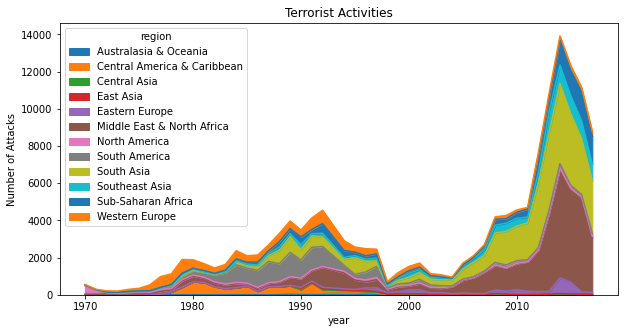

In [41]:
pd.crosstab(dataset.year,dataset.region).plot(kind='area',figsize=(10,5))
plt.title('Terrorist Activities')
plt.ylabel('Number of Attacks')
plt.show()

### To Know the target type of terrorists

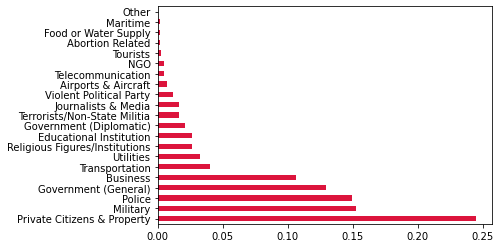

In [42]:
dataset.targ_type.value_counts(normalize=True).plot(kind='barh',color='crimson')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


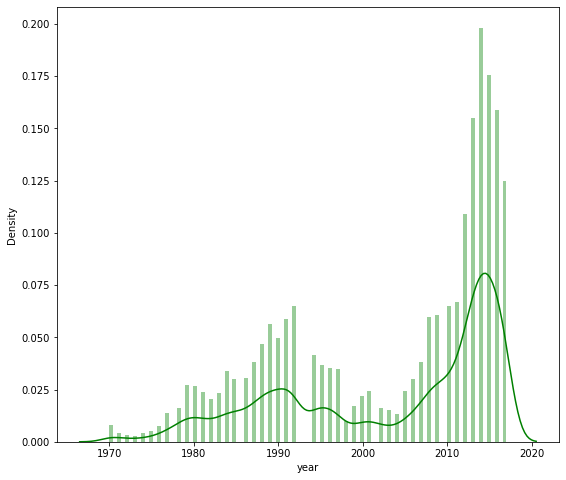

In [43]:
plt.figure(figsize=(9, 8))
sns.distplot(dataset['year'], color='g', bins=100, hist_kws={'alpha': 0.4});

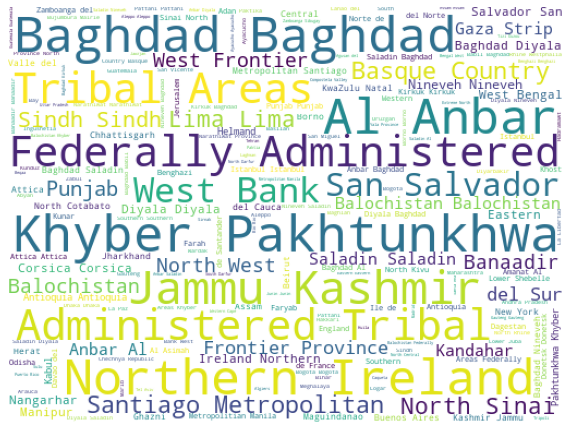

In [44]:
from wordcloud import WordCloud
from scipy import signal
cities = dataset.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### MOST ACTIVE GANG FROM 2004 to 2017

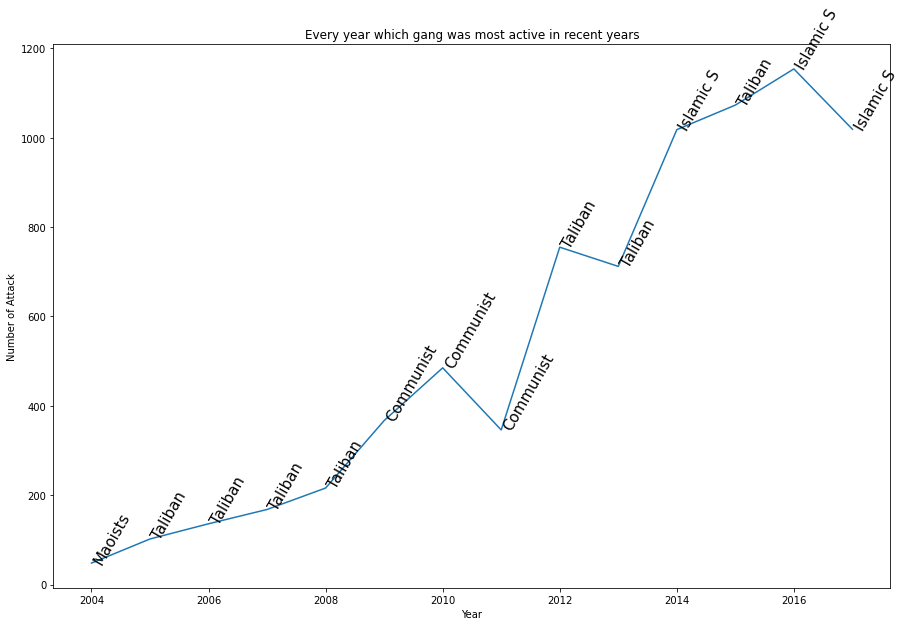

In [45]:
max_killevery_gname=[]
year=[]
g_name=[]
for i in dataset:
  if i=='year':
    for j in range(2004,2018):
      year.append(j)
      attack=dataset[dataset['year']==j]
      max_killevery_gname.append(attack.gang_name.value_counts()[1])
      g_name.append(attack.gang_name.value_counts()[1:2].keys())
most_kill = pd.DataFrame({'year' : year,
                                'gname' : g_name,
                                'Number of Attacks' : max_killevery_gname })
most_kill['gname']=most_kill['gname'].apply(lambda x: x[0] )
plt.figure(figsize=(15,10))
plt.xlabel('Year')
plt.ylabel('Number of Attack')
plt.title('Every year which gang was most active in recent years')
plt.plot(most_kill['year'],most_kill['Number of Attacks'])
for i in range(len(most_kill['year'])):
        plt.text(most_kill['year'][i],most_kill['Number of Attacks'][i],most_kill['gname'][i][0:9],rotation=60,fontsize=15)

## so we can say that from 2004 most active gang is Taliban,CPI-Maoist,ISIL

### now we will check type about these 3 gang what are there method of attacks

In [46]:
g_name=['Taliban','Communist Party of India - Maoist (CPI-Maoist)','Islamic State of Iraq and the Levant (ISIL)']
for i in g_name:
  print(i,':: '+dataset[dataset['gang_name']==i]['attack_type'].value_counts().idxmax())

Taliban :: Bombing/Explosion
Communist Party of India - Maoist (CPI-Maoist) :: Armed Assault
Islamic State of Iraq and the Levant (ISIL) :: Bombing/Explosion


## means all three gang mostly use Bombing/Explosion, Armed Assault)

## TOP 11 MOST ATTCKED COUNTRY

In [47]:
most_number_of_attack=pd.DataFrame(dataset['country'].value_counts())
most_number_of_attack=most_number_of_attack.reset_index()
most_number_of_attack=most_number_of_attack.rename(columns={'index':'country','country':'number_of_kill'})

In [48]:
TOP_11_MOST_ATTCKED_COUNTRY=most_number_of_attack[most_number_of_attack['number_of_kill']>3000]
TOP_11_MOST_ATTCKED_COUNTRY

,country,number_of_kill
0,Iraq,21510
1,Pakistan,12756
2,Afghanistan,10871
3,India,10491
4,Colombia,6865
5,Philippines,5843
6,Peru,4916
7,Turkey,3767
8,El Salvador,3369
9,Thailand,3346


<BarContainer object of 11 artists>

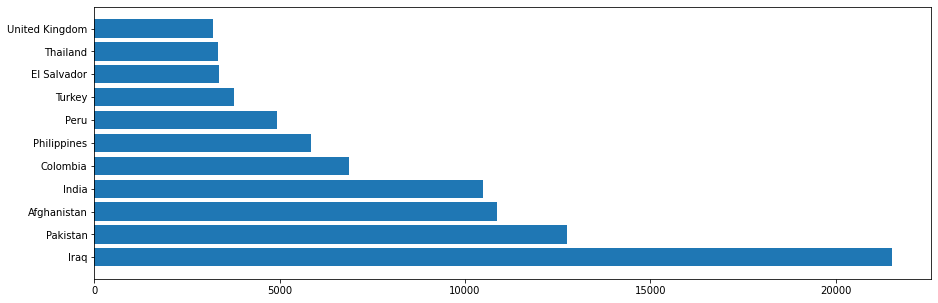

In [49]:
plt.figure(figsize=(15,5))
plt.barh(TOP_11_MOST_ATTCKED_COUNTRY.country,TOP_11_MOST_ATTCKED_COUNTRY.number_of_kill)

## So 11 country are most dangrous place to live bacause they are having most attacks

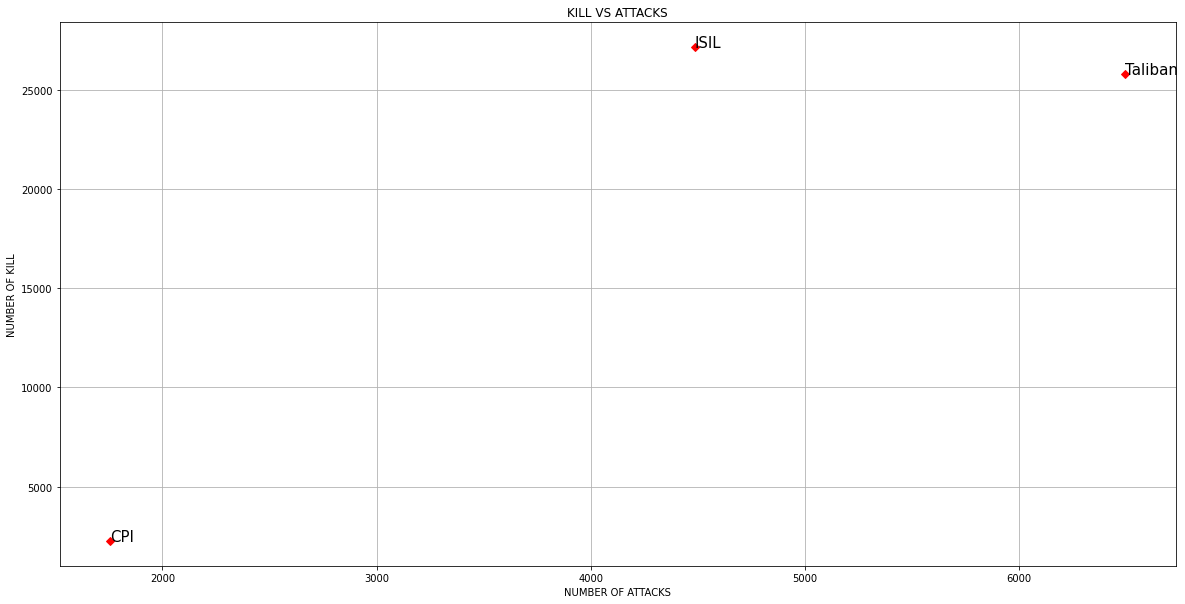

In [50]:
Taliban=dataset[dataset['gang_name']=='Taliban']
Taliban_number_attack=Taliban['country'].count()
Taliban_number_kill=Taliban['number_of_kill'].sum()
CPI=dataset[dataset['gang_name']=='Communist Party of India - Maoist (CPI-Maoist)']
CPI_number_attack=CPI['country'].count()
CPI_number_kill=CPI['number_of_kill'].sum()
ISIL=dataset[dataset['gang_name']=='Islamic State of Iraq and the Levant (ISIL)']
ISIL_number_attack=ISIL['country'].count()
ISIL_number_kill=ISIL['number_of_kill'].sum()
name_of_gang=['Taliban','CPI','ISIL']
plt.figure(figsize=(20,10))
x_nu_attack=[Taliban_number_attack,CPI_number_attack,ISIL_number_attack]
y_nu_kill=[Taliban_number_kill,CPI_number_kill,ISIL_number_kill]
plt.plot(x_nu_attack,y_nu_kill,'Dr')
plt.grid()
plt.title('KILL VS ATTACKS')
plt.xlabel('NUMBER OF ATTACKS')
plt.ylabel('NUMBER OF KILL')
for i in range(len(x_nu_attack)):
        plt.text(x_nu_attack[i],y_nu_kill[i],name_of_gang[i],fontsize=15)
# so we can write here out three active gang from last 20 year ISIL is the most attacks and killed org.

# conclusion
1.Country with most attacks:  Iraq

2.City with most attacks:  Baghdad

3.Region with the most attacks: Middle East & North Africa

4.Year with the most attacks: 2014

5.Month with the most attacks: 5

6.Group with the most attacks: Taliban

7.Most Attack Types: Bombing/Explosion

8.gang_name	VS number_of_kill

     a) Islamic State of Iraq and the Levant (ISIL)	27174.0

     b)	Taliban	25785.0

     c)	Boko Haram	10732.0

     d)	Liberation Tigers of Tamil Eelam (LTTE)	9393.0

     e)	Shining Path (SL)	9315.0

     f)	Al-Shabaab	6836.0

     g)	Farabundo Marti National Liberation Front (FMLN)	6801.0

     h)	Tehrik-i-Taliban Pakistan (TTP)	5580.0

     i)	Revolutionary Armed Forces of Colombia (FARC)	4380.0

     j)	Kurdistan Workers' Party (PKK)	4093.0

     k)	Al-Qaida in Iraq	3984.0

     l)	Nicaraguan Democratic Force (FDN)	3883.0

     m)	Al-Qaida	3818.0

     n)	Hutu extremists	3203.0

9.Maximum human killed by Al-Qaida

10.In last 20 year Al-Qaida is not active Gang.

11.country	VS number_of_kill

     a)Iraq	21510

     b)	Pakistan	12756

     c)	Afghanistan	10871

     d)	India	10491

     e)	Colombia	6865

     f)	Philippines	5843

     g)	Peru	4916

     h)	Turkey	3767

     i)	El Salvador	3369

     j)	Thailand	3346

     k)	United Kingdom	3212

12.From Last 20 Year 3 Gang are active.
    
     a) Taliban
     
     b) CPI 
      
     c) ISIL

13.YEAR--GANG------NUMBER OF MAXIMUM KILL

     a) 2004	---Taliban---	         48

     b) 2005	---Taliban---       102

     c) 2006	---Taliban---	        168

     d) 2007	---Taliban---	        216

     e) 2008	---Taliban---	        136

     f) 2009	---CPI-Maoist---	    367

     g) 2010	---CPI-Maoist---	    485

     h) 2011	---CPI-Maoist---	    346

     i) 2012	---Taliban---	        755

     j) 2013	---Taliban---	        712

     k) 2014	---ISIL---	         1018

     l) 2015	---Taliban---	       1073

     m) 2016	---ISIL---	         1153

     n) 2017	---ISIL---	         1019

14.These are two most method used by all three most active gang is 
Bombing/Explosion, Armed Assault and Hostage Taking (Kidnapping)

15.Al_Qaida Most mischievous gang in early 20's and have done most number kill till date and the weapon used for killing is only two
Explosives and vehicle-borne explosive
so if we control on the illegal tranportation of weapons then we can reduse
we can see that in only one year (2001) there were 2 attacks on the same day so we can in same country
so we can say that there might me some disput between USA and Al_Qaida